Data Collection, Processing, and Cleansing

In [3]:
import pandas as pd

# Load the diabetes dataset from CSV
diabetes = pd.read_csv("/content/diabetes_dataset.csv")

# Separate features (X) and target (y)
X = diabetes.drop(columns=['Outcome'])  # All columns except 'Outcome'
y = diabetes['Outcome']  # Target column


In [5]:
print("Dataset shape:", X.shape)
print("First 5 rows:\n", X.head())


Dataset shape: (500, 7)
First 5 rows:
    Age  Gender   BMI  BloodPressure  Glucose  Insulin  \
0   59  Female  30.2            119      118    196.6   
1   72  Female  34.9            104      173    202.9   
2   49    Male  38.8             93      130    270.1   
3   35    Male  36.7             62      192    196.5   
4   63  Female  23.4             96       78    190.0   

   DiabetesPedigreeFunction  
0                      0.21  
1                      0.44  
2                      0.76  
3                      2.43  
4                      0.90  


In [6]:
# Check for missing values
print("Missing values per column:", X.isnull().sum())

Missing values per column: Age                         0
Gender                      0
BMI                         0
BloodPressure               0
Glucose                     0
Insulin                     0
DiabetesPedigreeFunction    0
dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler

# Encode categorical column 'Gender' before scaling
X_encoded = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
X_scaled = scaler.fit_transform(X_encoded)

print("Shape after scaling:", X_scaled.shape)


Shape after scaling: (500, 7)


In [11]:
from sklearn.model_selection import train_test_split

# Split the scaled features and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (350, 7)
Testing set shape: (150, 7)


Bias Detection and Mitigation

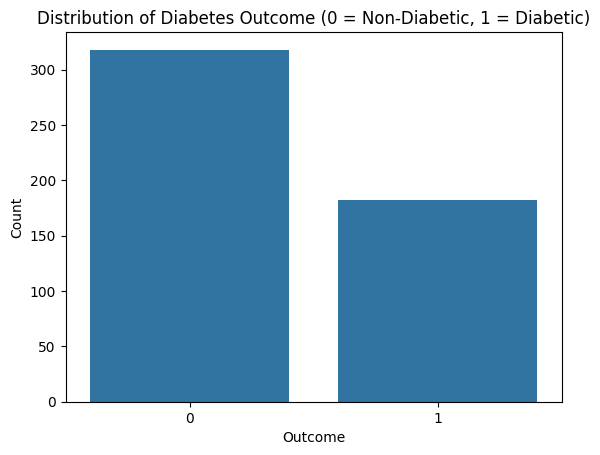

In [13]:

# Bias Detection Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of the target variable (Outcome)
sns.countplot(x=y)
plt.title("Distribution of Diabetes Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()


In [15]:

# Apply SMOTE only on the training set (after encoding & scaling)
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Fit & resample
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Original training shape:", X_train.shape, y_train.shape)
print("Resampled training shape:", X_resampled.shape, y_resampled.shape)


Original training shape: (350, 7) (350,)
Resampled training shape: (432, 7) (432,)


In [17]:

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Initialize the model with a higher max_iter to ensure convergence
model = LogisticRegression(max_iter=1000, solver='lbfgs')

# Fit the model on the resampled training data
model.fit(X_resampled, y_resampled)

print("Model training completed successfully!")


Model training completed successfully!


In [19]:

# Corrected Predictions and Classification Report
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.48      0.56       102
           1       0.30      0.48      0.37        48

    accuracy                           0.48       150
   macro avg       0.48      0.48      0.46       150
weighted avg       0.55      0.48      0.50       150

